<a href="https://colab.research.google.com/github/Akanksha546/notebook2/blob/main/MLkmedoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

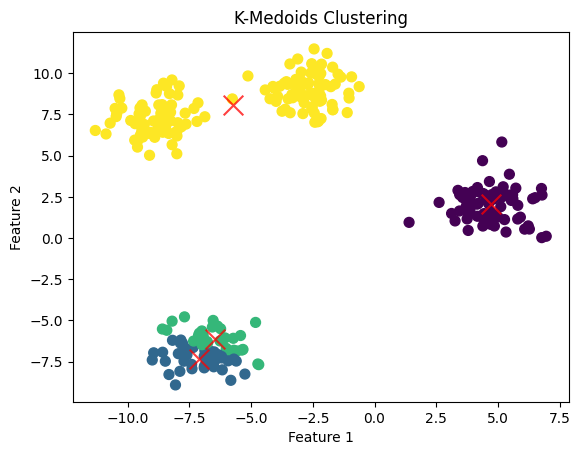

In [ ]:
#without using k-medoid lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import random

def k_medoids(X, k, max_iter=100):
    # Step 1: Initialize medoids randomly
    m = X.shape[0]
    initial_medoids_indices = random.sample(range(m), k)
    medoids = X[initial_medoids_indices]

    for _ in range(max_iter):
        # Step 2: Assign each point to the nearest medoid
        labels = pairwise_distances_argmin(X, medoids)

        # Step 3: Calculate new medoids
        new_medoids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 4: Check for convergence
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Generating synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Applying k-medoids algorithm
k = 4
medoids, labels = k_medoids(X, k)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
pip install scikit-learn-extra #library for k-medoids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.4 MB/s eta 0:00:00


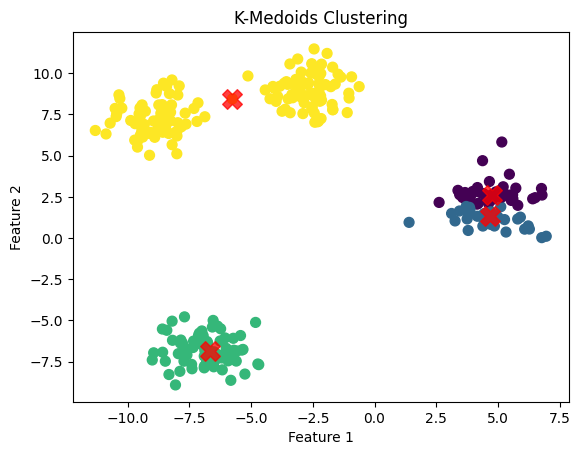

In [ ]:
#using K-medoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

#generate synthetic data using make_blobs
X,y=make_blobs(n_samples=300,centers=4,random_state=42)

#apply k-medoids algorithm
k=4
kmedoids=KMedoids(n_clusters=k,random_state=42)
kmedoids.fit(X)

#get the medoids and labels
medoids=kmedoids.cluster_centers_
labels=kmedoids.labels_

#plot the results
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(medoids[:,0],medoids[:,1],c='red',s=200,alpha=0.75,marker='X')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

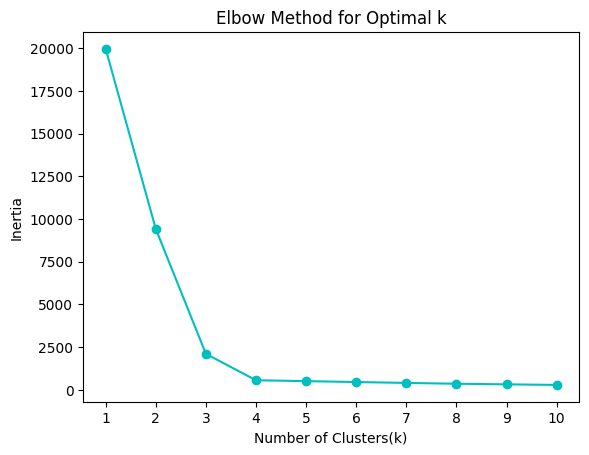

In [ ]:
#elbow method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#generate synthetic data using make_blobs
X,y=make_blobs(n_samples=300,centers=4,random_state=42)
#calculate the sum of squared distances(inertia)for different
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#plot the elbow curve
plt.plot(k_range,inertia,'co-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()